In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
warnings.filterwarnings("ignore")
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.under_sampling import TomekLinks
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score,classification_report
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix

In [2]:
df = pd.read_csv('churn.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# Checking for Nulls and Duplicates

In [5]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [6]:
df.duplicated().sum()

0

# Data Cleaning

In [7]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

We can find that columns such as Rownumber, CustomerID and Surname are useless data as it won't affect
our model performance so we can drop them.

In [8]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Exploratory Data Analysis

<AxesSubplot:xlabel='Gender', ylabel='count'>

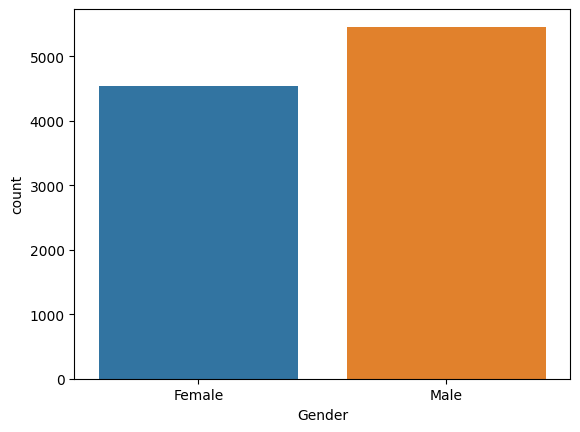

In [9]:
sns.countplot(x = df['Gender'])

We can find that is a slight little difference in the numbers of Males and females

<AxesSubplot:xlabel='Geography', ylabel='count'>

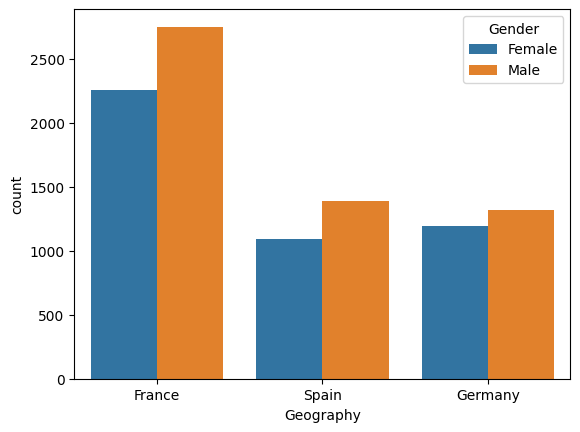

In [10]:
sns.countplot( data = df , x= df['Geography'] , hue= df['Gender'])

We have more female customer than there are male customers in each of the three respective countries. 

<AxesSubplot:xlabel='NumOfProducts', ylabel='count'>

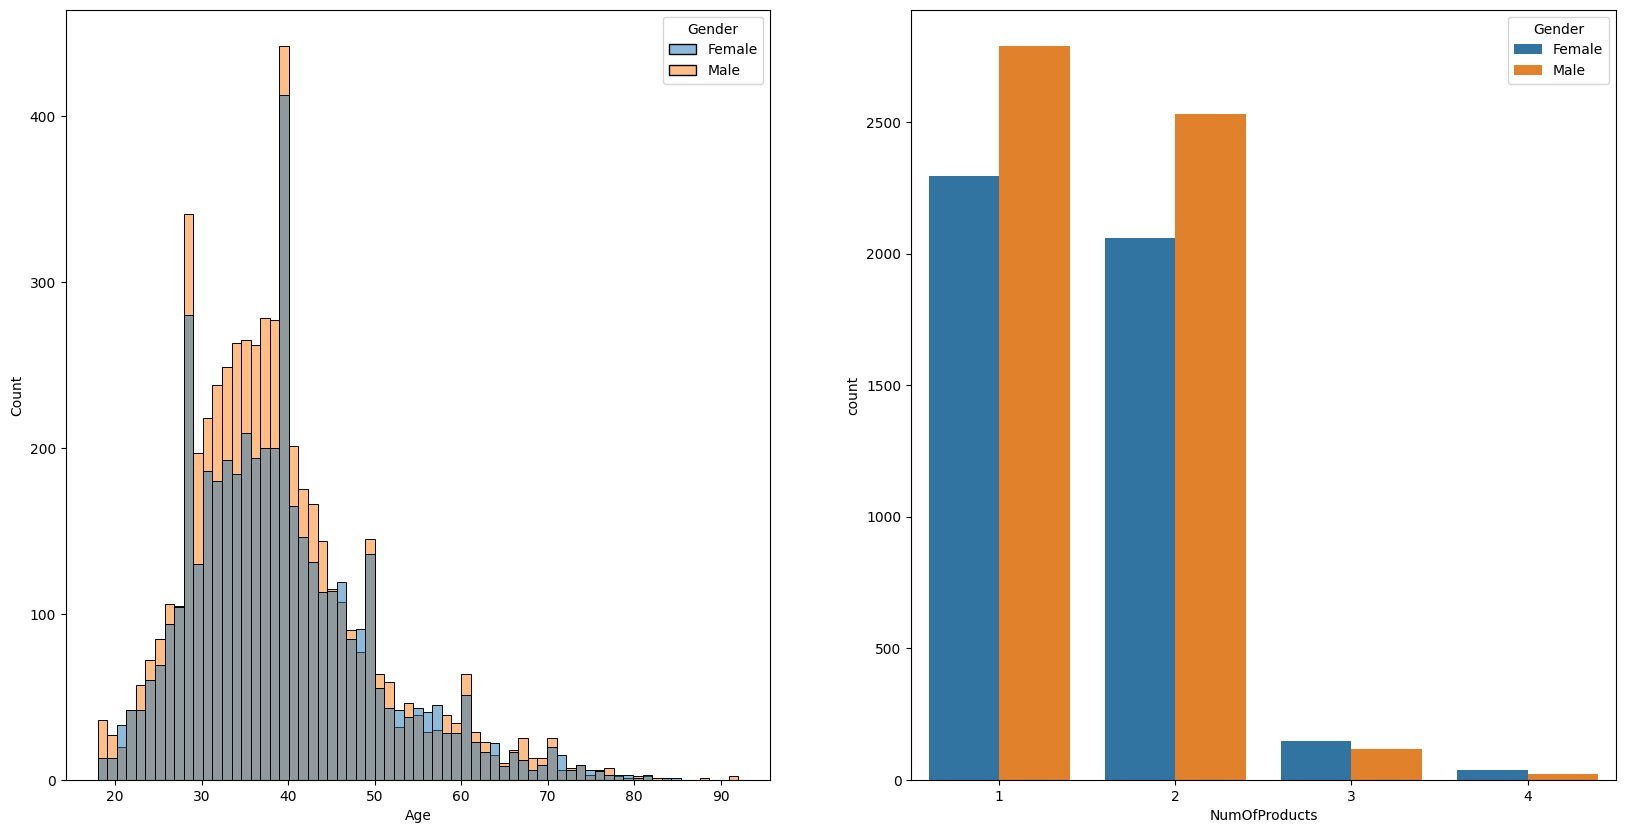

In [11]:
plt.figure(figsize = (20,10))

# subplot 1
plt.subplot(1, 2, 1)
sns.histplot(x = df['Age'] ,hue = df['Gender'])

# subplot 2
plt.subplot(1, 2, 2)
sns.countplot(x = df['NumOfProducts'] , data = df, hue = df['Gender'])

1. Majority of the customers age range from around 28 years to 45 years with Males representing the most in this range.
2. There is major decrease in the customers count from ages of range 50 to 85.
3. Most of the customers have 1 or 2 products in which they use from the bank with males being higher than females.

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

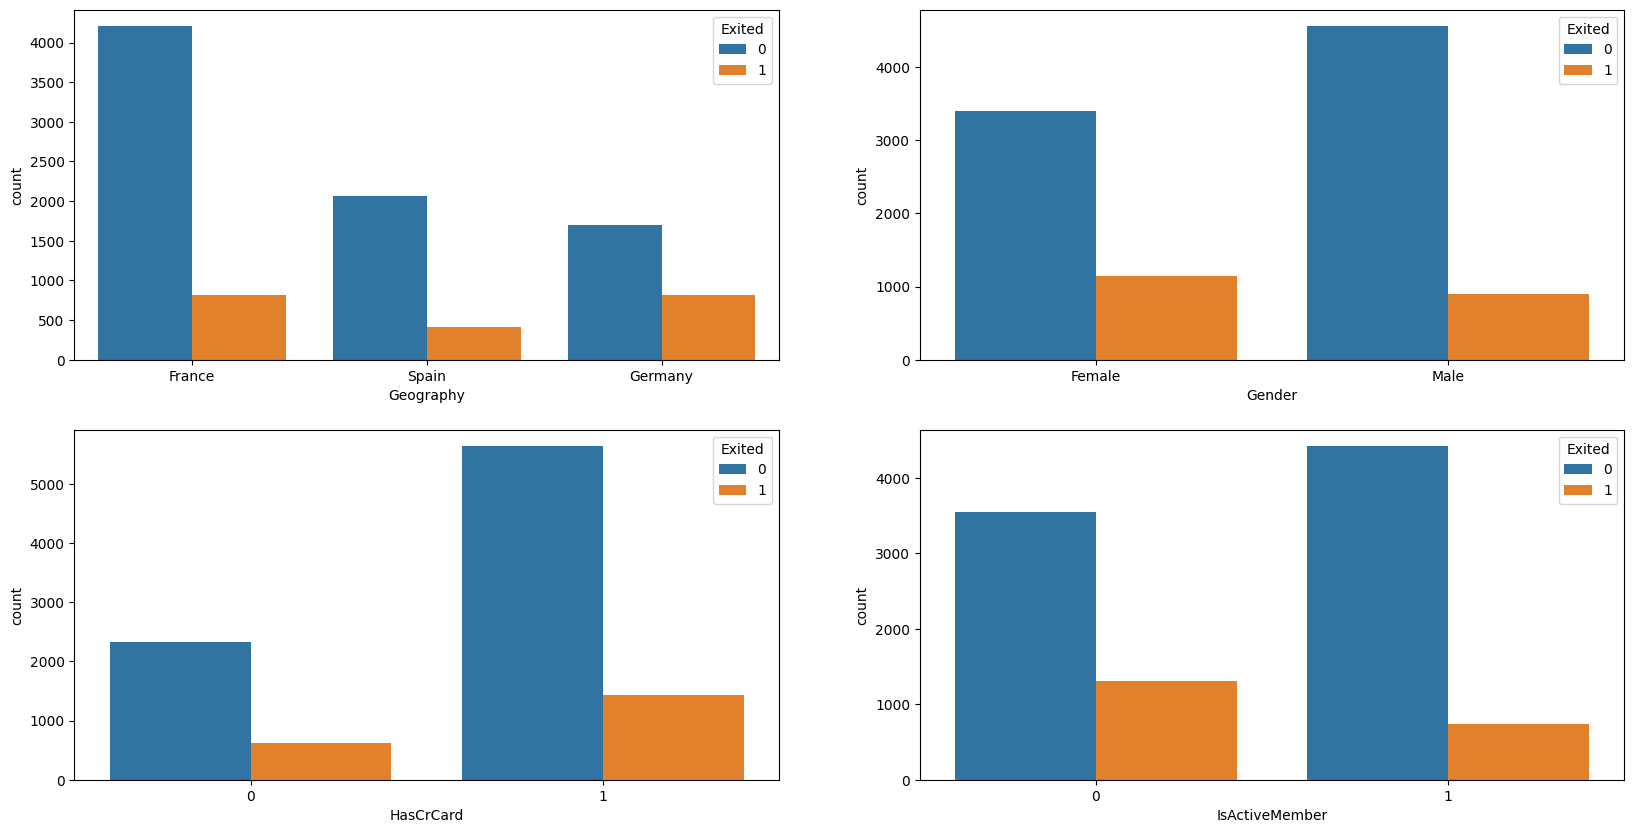

In [12]:
plt.figure(figsize = (20,10))

# subplot 1
plt.subplot(2, 2, 1)
sns.countplot(x='Geography', hue = 'Exited',data = df)

# subplot 2
plt.subplot(2, 2, 2)
sns.countplot(x = 'Gender', hue = 'Exited',data = df)

# subplot 3
plt.subplot(2, 2, 3)
sns.countplot(x = 'HasCrCard', hue = 'Exited',data = df)

# subplot 4
plt.subplot(2, 2, 4)
sns.countplot(x = 'IsActiveMember', hue = 'Exited',data = df)

# Key Findings : 

1. We find that the number of customers leaving in germany and france is higher than in spain.
2. We find too that number of customers staying in france is higher than in germany and spain by alot.
3. More Females left the bank than males and more males stayed as customers in the bank than females.
4. Number of customers left while having a credit card is higher than customers left without having one.
5. Number of customers stayed while having credit card is higher than customers stayed without having one.
6. Number of customers left the bank with not being active is higher than customers left while being active.
7. Number of customers stayed with being active is higher than customers stayed without being active.

# Encoding of categorical features (Geography & Gender)

In [13]:
df['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [14]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [15]:
pd.get_dummies(df['Geography'])

,France,Germany,Spain
0,1,0,0
1,0,0,1
2,1,0,0
3,1,0,0
4,0,0,1
...,...,...,...
9995,1,0,0
9996,1,0,0
9997,1,0,0
9998,0,1,0


This feature is a nominal one which is best dealt with one hot encoding.

In [16]:
df = df.join(pd.get_dummies(df['Geography'], drop_first = False)).drop(['Geography'], axis = 1)

In [17]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [18]:
df['Gender'] = df['Gender'].map({'Male':1 , 'Female':0})
df['Gender'].unique()

# replaced the gender values of (male,female) with values of ( 1 for male , 0 for female)

array([0, 1], dtype=int64)

# Correlation

<AxesSubplot:>

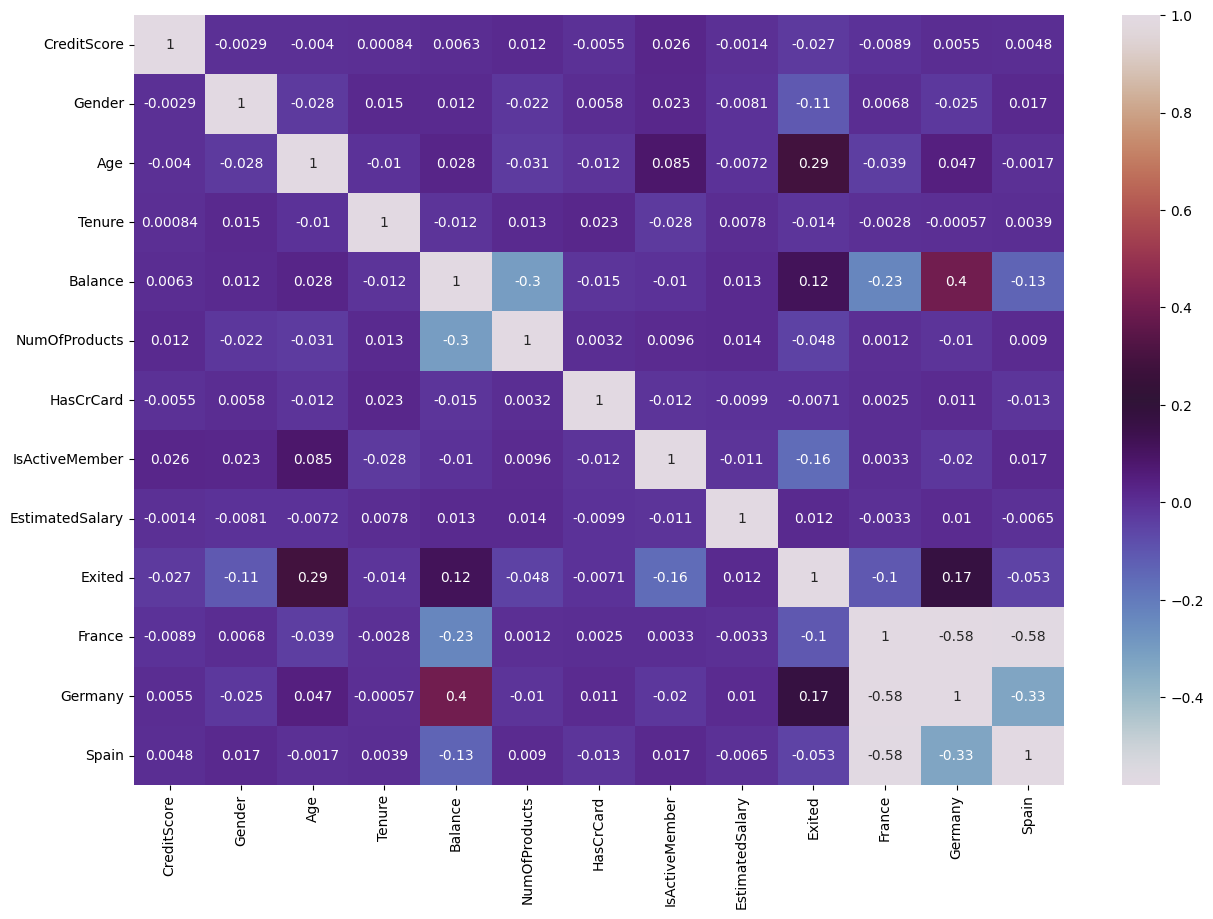

In [19]:
corr = df.corr()
plt.figure(figsize = (15,10))
sns.heatmap(corr , cmap = 'twilight', annot = True)

1. We can find that there is no features that is heavily correlated to each other.
2. This is great for our performance of the model.
3. No feature selection is needed. 

# Splitting of Data

In [20]:
x = df.drop(['Exited'], axis = 1)
y = df['Exited']

# Check for data imbalancement

Counter({0: 7963, 1: 2037})


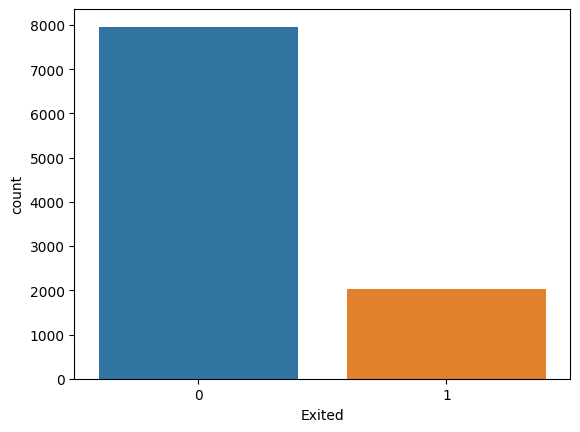

In [21]:
sns.countplot(x = df['Exited'])
print(Counter(y))

1. We find that the number of people to leave the bank is too low compared to number of people to stay in the bank.
2. We can solve the problem by applying SMOTE or RandomOverSampler

# Handling imbalanced data

In [22]:
Counter(y)

Counter({1: 2037, 0: 7963})

In [23]:
smote = SMOTE(sampling_strategy = 'minority', k_neighbors = 4)
x,y = smote.fit_resample(x,y)

In [24]:
Counter(y)

Counter({1: 7963, 0: 7963})

Now, it is solved so we can do the train test split.

# Train test Split & Scaling

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state =42)

In [26]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

1. We just scaled the the input features
2. We applied a fit_transform for the x_train
3. For the x_test, we just applied a transform function

# Bagging (with KNN, DT, Logistic Reg.)

In [27]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [28]:
tree_clf = DecisionTreeClassifier()
log_clf = LogisticRegression()
knn_clf = KNeighborsClassifier()

In [29]:
# 500 decision trees will be trained.
tree_bag = BaggingClassifier( base_estimator = tree_clf, n_estimators = 500, bootstrap = True, n_jobs = -1, random_state = 42)

log_bag = BaggingClassifier( base_estimator = log_clf, n_estimators = 500, bootstrap = True, n_jobs = -1, random_state = 42)

knn_bag = BaggingClassifier( base_estimator = knn_clf, n_estimators = 500, bootstrap = True, n_jobs = -1, random_state = 42 )

# Evaluation

In [30]:
#tree
tree_bag.fit(x_train,y_train)
tree_pred = tree_bag.predict(x_test)

#logstic
log_bag.fit(x_train,y_train)
log_pred = log_bag.predict(x_test)

#knn
knn_bag.fit(x_train,y_train)
knn_pred = knn_bag.predict(x_test)

In [31]:
print(tree_pred)
print('***********')
print(log_pred)
print('***********')
print(knn_pred)

[0 1 0 ... 0 1 1]
***********
[0 1 0 ... 1 1 1]
***********
[0 1 0 ... 0 1 1]


In [32]:
final_pred = ((tree_pred + log_pred + knn_pred) / 3)
final_pred

array([0.        , 1.        , 0.        , ..., 0.33333333, 1.        ,
       1.        ])

Text(0.5, 1.0, 'confusion matrix of bagging')

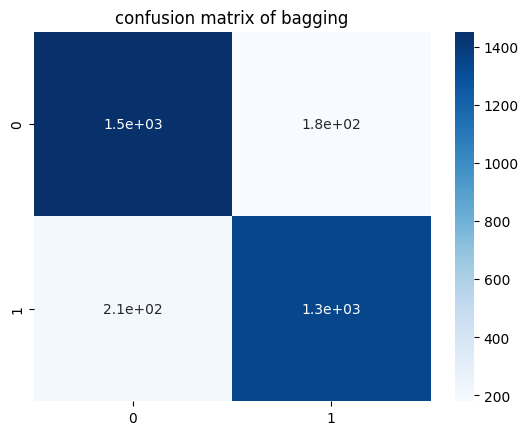

In [33]:
cnf_mat = confusion_matrix(y_test,final_pred.round())
sns.heatmap( cnf_mat , annot = True , cmap = 'Blues')
plt.title('confusion matrix of bagging')

In [34]:
accuracy_bag = accuracy_score(y_test, final_pred.round())
print(f'The accuracy of the bagging model is = {accuracy_bag*100} %')
recall = recall_score(y_test, final_pred.round())
print(f'The recall of the bagging model is = {recall * 100} %')
precision = precision_score(y_test, final_pred.round())
print(f'The precision of the bagging model is = {precision * 100} %')
f1 = f1_score(y_test, final_pred.round())
print(f'The f1_score of the bagging model is = {f1 * 100} %')

The accuracy of the bagging model is = 87.88449466415568 %
The recall of the bagging model is = 86.73535093367676 %
The precision of the bagging model is = 88.21218074656188 %
The f1_score of the bagging model is = 87.46753246753246 %


In [35]:
report = classification_report(y_test, final_pred.round())
print(report)

              precision    recall  f1-score   support

           0       0.88      0.89      0.88      1633
           1       0.88      0.87      0.87      1553

    accuracy                           0.88      3186
   macro avg       0.88      0.88      0.88      3186
weighted avg       0.88      0.88      0.88      3186



# Random Forest

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rf = RandomForestClassifier( n_estimators = 500, bootstrap = True, n_jobs = -1, random_state =42)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

# Random Forest Evaluation

Text(0.5, 1.0, 'confusion matrix of random forest')

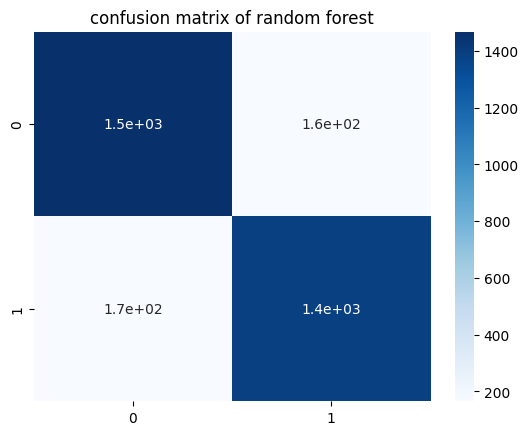

In [38]:
cnf_mat = confusion_matrix(y_test,y_pred)
sns.heatmap( cnf_mat , annot = True , cmap = 'Blues')
plt.title('confusion matrix of random forest')

In [39]:
accuracy_random = accuracy_score(y_test, y_pred)
print(f'The accuracy of the random forest model is = {accuracy_random * 100} %')
recall = recall_score(y_test, y_pred)
print(f'The recall of the random forest model is = {recall * 100} %')
precision = precision_score(y_test, y_pred)
print(f'The precision of the random forest model is = {precision * 100} %')
f1 = f1_score(y_test, y_pred)
print(f'The f1_score of the random forest model is = {f1 * 100} %')

The accuracy of the random forest model is = 89.61079723791589 %
The recall of the random forest model is = 89.31101094655506 %
The precision of the random forest model is = 89.36855670103093 %
The f1_score of the random forest model is = 89.33977455716587 %


In [40]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1633
           1       0.89      0.89      0.89      1553

    accuracy                           0.90      3186
   macro avg       0.90      0.90      0.90      3186
weighted avg       0.90      0.90      0.90      3186



# Adaboost

In [41]:
from sklearn.ensemble import AdaBoostClassifier

In [43]:
Adaboost = AdaBoostClassifier( base_estimator = DecisionTreeClassifier(), n_estimators = 200, learning_rate = 0.5,
                                   random_state = 42)
Adaboost.fit(x_train,y_train)
y_pred = Adaboost.predict(x_test)

# Adaboost Evaluation

Text(0.5, 1.0, 'confusion matrix of Adaboost')

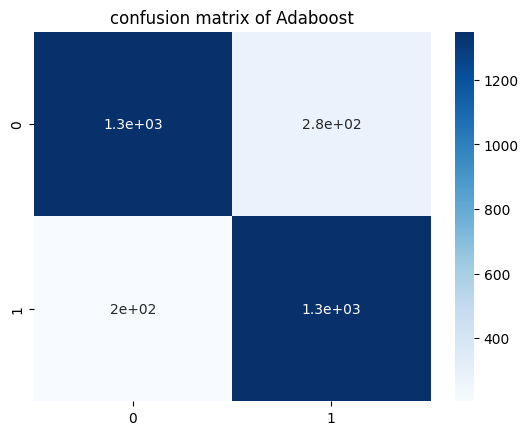

In [44]:
cnf_mat = confusion_matrix(y_test,y_pred)
sns.heatmap( cnf_mat , annot = True , cmap = 'Blues')
plt.title('confusion matrix of Adaboost')

In [45]:
accuracy_boost = accuracy_score(y_test, y_pred)
print(f'The accuracy of the Adaboost model is = {accuracy_boost * 100} %')
recall = recall_score(y_test, y_pred)
print(f'The recall of the Adaboost model is = {recall * 100} %')
precision = precision_score(y_test, y_pred)
print(f'The precision of the Adaboost model is = {precision * 100} %')
f1 = f1_score(y_test, y_pred)
print(f'The f1_score of the Adaboost model is = {f1 * 100} %')

The accuracy of the Adaboost model is = 84.65160075329567 %
The recall of the Adaboost model is = 86.79974243399872 %
The precision of the Adaboost model is = 82.59803921568627 %
The f1_score of the Adaboost model is = 84.64678178963892 %


In [46]:
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1633
           1       0.83      0.87      0.85      1553

    accuracy                           0.85      3186
   macro avg       0.85      0.85      0.85      3186
weighted avg       0.85      0.85      0.85      3186



# Comparsion of Models Evaluation (Accuracy)

Text(0.5, 1.0, 'The Accuracy scores of the models : ')

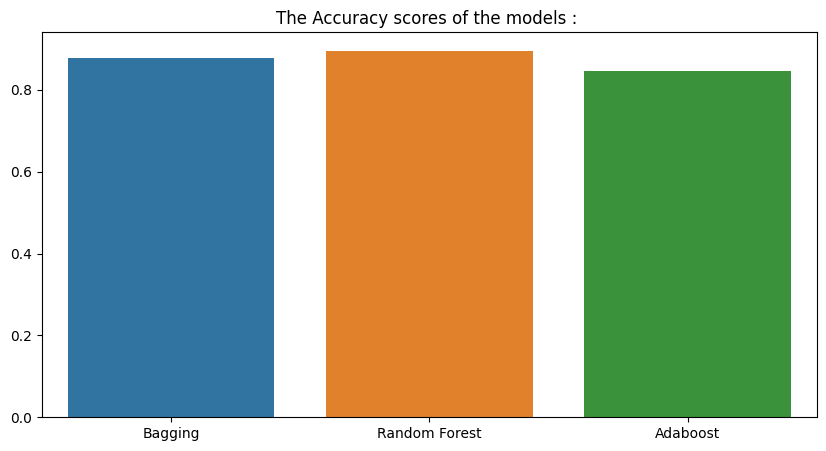

In [50]:
models = ['Bagging', 'Random Forest', 'Adaboost']
scores = [accuracy_bag, accuracy_random, accuracy_boost]
plt.figure(figsize = (10,5))
sns.barplot(x = models, y = scores, data =df)
plt.title('The Accuracy scores of the models : ')

# Conclusion : 

1. We can conclude from the plot above that Random forest classifier scored the highest accuracy.
2. Bagging Classifier in which we used the (Decision Tree, KNN and Logistic Regression) models was much near to the accuracy scored by the random forest classifier
3. Adaboost Classifier had the lowest score among all of the classifiers